In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Tâches

### 1.1.Charge le dataset

In [5]:
df = pd.read_csv("/Users/bouillaud/Desktop/WCS/QUETES/Quete_ACP/dataset_pokemon_Feuille 1.csv")

In [7]:
df.shape

(914, 9)

In [8]:
# Unnamed: 7 = Total
# Unnamed: 8 = Moyenne
df.head()

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0,318,53
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0,405,"67,5"
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0,525,"87,5"
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0,625,"104,17"
4,Salamèche,39.0,52.0,43.0,NaN,50.0,65.0,309,"51,5"


### 1.2.Trouve un moyen de compléter le dataframe pour qu'il soit remplie à 100%
### 1.3.Tranforme toutes les colonnes en float sauf la colonne Nom (logique)

In [9]:
df["Nom"].describe() # Constat : un nom pour chaque ligne, de type objet

count         914
unique        914
top       Mélofée
freq            1
Name: Nom, dtype: object

In [10]:
df["PV"].describe()

count    909.000000
mean      69.501650
std       26.197808
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: PV, dtype: float64

In [11]:
PV_manquant = df[pd.isna(df['PV'])] # on cherche les valeurs manquantes (autre solution : df[df["PV"].isnull()])
PV_manquant

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
478,Cheniselle\n(Cape Déchet),NaN,69.0,95.0,69.0,95.0,36.0,424,"70,67"
766,Dimoclès,NaN,110.0,150.0,45.0,49.0,35.0,448,"74,67"
784,Rexillius,NaN,121.0,119.0,69.0,59.0,71.0,521,"86,83"
785,Amagara,NaN,59.0,50.0,67.0,63.0,46.0,362,"60,33"
786,Dragmara,NaN,77.0,72.0,99.0,92.0,58.0,521,"86,83"


In [12]:
# remplacement des strings pour les colonnes 7 & 8

In [13]:
df["Unnamed: 7"] = df["Unnamed: 7"].str.replace(r"[a-zA-Z]",'')

In [14]:
df["Unnamed: 8"] = df["Unnamed: 8"].str.replace(r"[a-zA-Z]",'')

In [15]:
# remplacement des virgules, point-virgules pour la colonne 8

In [16]:
df["Unnamed: 8"] = df["Unnamed: 8"].str.replace(",",".")

In [17]:
df["Unnamed: 8"] = df["Unnamed: 8"].str.replace(";",".")

In [18]:
# conversion des valeurs aux colonnes 7 & 8 en float

In [19]:
df["Unnamed: 7"] = pd.to_numeric(df["Unnamed: 7"], downcast="float")

In [20]:
df["Unnamed: 8"] = pd.to_numeric(df["Unnamed: 8"], downcast="float")

In [21]:
# confirmation de la conversion

In [22]:
df["Unnamed: 7"].dtype

dtype('float32')

In [23]:
df["Unnamed: 8"].dtype

dtype('float32')

In [24]:
df2 = df

#### Colonne PV

In [25]:
df2[df2["PV"].isnull()]

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
478,Cheniselle\n(Cape Déchet),NaN,69.0,95.0,69.0,95.0,36.0,424.0,70.669998
766,Dimoclès,NaN,110.0,150.0,45.0,49.0,35.0,448.0,74.669998
784,Rexillius,NaN,121.0,119.0,69.0,59.0,71.0,521.0,86.830002
785,Amagara,NaN,59.0,50.0,67.0,63.0,46.0,362.0,60.330002
786,Dragmara,NaN,77.0,72.0,99.0,92.0,58.0,521.0,86.830002


In [26]:
import math
for index, row in df2.iterrows():
    val_pv = row['PV']
    if math.isnan(val_pv):
        df2.loc[index,'PV'] = ((row['Unnamed: 7']) - ((row['Attaque'])+(row['Défense'])+(row['Att. Spé.'])+(row['Déf. Spé.'])+(row['Vitesse'])))


In [27]:
df2[df2["PV"].isnull()] # il n'y a plus de valeurs nulles.

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8


#### Colonne Attaque

In [28]:
df2[df2["Attaque"].isnull()]

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
50,Feunard d'Alola,73.0,NaN,75.0,81.0,100.0,109.0,505.0,84.169998
139,Leveinard,250.0,NaN,5.0,35.0,105.0,50.0,450.0,75.000000
364,Avaltout,100.0,NaN,83.0,73.0,83.0,55.0,467.0,NaN
443,Rayquaza,105.0,NaN,90.0,150.0,90.0,95.0,680.0,113.330002
525,Luminéon,69.0,NaN,76.0,69.0,86.0,91.0,460.0,76.669998
818,Volcanion,80.0,NaN,120.0,130.0,90.0,70.0,600.0,100.000000
819,Brindibou,68.0,NaN,55.0,50.0,50.0,42.0,320.0,53.330002
820,Efflèche,78.0,NaN,75.0,70.0,70.0,52.0,420.0,70.000000
821,Archéduc,78.0,NaN,75.0,100.0,100.0,70.0,530.0,88.330002
822,Flamiaou,45.0,NaN,40.0,60.0,40.0,70.0,320.0,55.330002


In [29]:
for index, row in df2.iterrows():
    val_attaque = row['Attaque']
    if math.isnan(val_attaque):
        df2.loc[index,'Attaque'] = ((row['Unnamed: 7']) - ((row['PV'])+(row['Défense'])+(row['Att. Spé.'])+(row['Déf. Spé.'])+(row['Vitesse'])))

In [30]:
df2[df2["Attaque"].isnull()] # il n'y a plus de valeurs nulles.

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8


#### Colonne Défense

In [31]:
df2[df2["Défense"].isnull()]

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
9,Carapuce,44.0,48.0,NaN,50.0,64.0,43.0,314.0,52.330002
67,Miaouss d'Alola,40.0,35.0,NaN,50.0,40.0,90.0,290.0,48.330002
180,Mewtwo,106.0,110.0,NaN,154.0,90.0,130.0,680.0,113.330002
292,Jungko,70.0,85.0,NaN,105.0,85.0,120.0,530.0,88.330002
550,Motisma\n(Forme Chaleur),50.0,65.0,NaN,105.0,107.0,86.0,520.0,86.669998
623,Brutapode,60.0,100.0,NaN,55.0,69.0,112.0,485.0,80.830002
624,Doudouvet,40.0,27.0,NaN,37.0,50.0,66.0,280.0,46.669998
625,Farfaduvet,60.0,67.0,NaN,77.0,75.0,116.0,480.0,80.000000


In [32]:
for index, row in df2.iterrows():
    val_defense = row['Défense']
    if math.isnan(val_defense):
        df2.loc[index,'Défense'] = ((row['Unnamed: 7']) - ((row['PV'])+(row['Attaque'])+(row['Att. Spé.'])+(row['Déf. Spé.'])+(row['Vitesse'])))

In [33]:
df2[df2["Défense"].isnull()] # il n'y a plus de valeurs nulles.

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8


#### Colonne Att. Spé.

In [34]:
df2.rename(columns={"Att. Spé.":"att_spe"}, inplace=True) # à renommer au début la prochaine fois

In [35]:
df2.rename(columns={"Déf. Spé.":"def_spe"}, inplace=True) # à renommer au début la prochaine fois

In [38]:
for index, row in df2.iterrows():
    val_att_spe = row['att_spe']
    if math.isnan(val_att_spe):
        df2.loc[index,'att_spe'] = ((row['Unnamed: 7']) - ((row['PV'])+(row['Attaque'])+(row['Défense'])+(row['def_spe'])+(row['Vitesse'])))

In [39]:
df2[df2["att_spe"].isnull()]

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse,Unnamed: 7,Unnamed: 8


In [40]:
df2.head()

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse,Unnamed: 7,Unnamed: 8
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0,318.0,53.000000
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0,405.0,67.500000
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0,525.0,87.500000
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0,625.0,104.169998
4,Salamèche,39.0,52.0,43.0,60.0,50.0,65.0,309.0,51.500000


In [41]:
for index, row in df2.iterrows():
    val_def_spe = row['def_spe']
    if math.isnan(val_def_spe):
        df2.loc[index,'def_spe'] = ((row['Unnamed: 7']) - ((row['PV'])+(row['Attaque'])+(row['Défense'])+(row['att_spe'])+(row['Vitesse'])))

In [42]:
df2[df2["def_spe"].isnull()]

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse,Unnamed: 7,Unnamed: 8


#### Colonne Vitesse

In [43]:
df2[df2["Vitesse"].isnull()]

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse,Unnamed: 7,Unnamed: 8
28,Piafabec,40.0,60.0,30.0,31.0,31.0,NaN,262.0,43.669998
263,Airmure,65.0,80.0,140.0,40.0,70.0,NaN,465.0,77.500000


In [44]:
for index, row in df2.iterrows():
    val_vitesse = row['Vitesse']
    if math.isnan(val_vitesse):
        df2.loc[index,'Vitesse'] = ((row['Unnamed: 7']) - ((row['PV'])+(row['Attaque'])+(row['Défense'])+(row['att_spe'])+(row['def_spe'])))

In [45]:
df2[df2["Vitesse"].isnull()]

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse,Unnamed: 7,Unnamed: 8


### 2. Crée un nouveau dataframe qui ne contiendra que les colonnes : PV, Attaque, Défense , Att. Spé., Déf. Spé., Vitesse.

In [46]:
df3 = df2.drop(columns=["Unnamed: 7", "Unnamed: 8"], axis=1)
df3.head()

,Nom,PV,Attaque,Défense,att_spe,def_spe,Vitesse
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0
4,Salamèche,39.0,52.0,43.0,60.0,50.0,65.0


### 3. Stocke les noms des colonnes dans un array que tu nommeras columnsNames et les valeurs des colonnes dans un autre array que tu nommeras X.


In [47]:
columnsNames = df3.columns
columnsNames

Index(['Nom', 'PV', 'Attaque', 'Défense', 'att_spe', 'def_spe', 'Vitesse'], dtype='object')

In [71]:
X = df3.values
X

### 4. Explique ce que font les 3 lignes de code ci-dessous. Pourquoi nous n'en avons pas besoin dans notre cas ?

In [50]:
from sklearn import preprocessing 
std_scale = preprocessing.StandardScaler().fit(X) 
X_scaled = std_scale.transform(X)
# importe un package de fonctions utilisées afin d'adapter les valeurs et produire une distribution normale.
# Dans notre cas, comme les valeurs du dataset sont dans des proportions équivalentes, pas d'utilité.

### 5. Quelles sont les deux méthodes de l'objet pca qui sont regroupées dans la méthode fit_transform() ?

### 6. Instancie un objet pca dans le cas ou on ne sait pas encore le nombre de composante principale que l'on souhaite calculer.

In [81]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=None)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 7. Calcule les composantes principales de X et effectue une projection des individus avec pca.fit_transform(X).


In [68]:
df4 = df3.drop(columns=["Nom"], axis=1)
df4.head()

,PV,Attaque,Défense,att_spe,def_spe,Vitesse
0,45.0,49.0,49.0,65.0,65.0,45.0
1,60.0,62.0,63.0,80.0,80.0,60.0
2,80.0,82.0,83.0,100.0,100.0,80.0
3,80.0,100.0,123.0,122.0,120.0,80.0
4,39.0,52.0,43.0,60.0,50.0,65.0


In [73]:
X = df4.values

In [84]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
print(pca.explained_variance_ratio_)
# la première composante explique 45% de la variance, et la deuxième un peu moins de 20.

[0.45427375 0.19362961 0.13723484 0.09897258 0.07281017 0.04307906]


In [86]:
pca.fit_transform(X)

array([[-47.24779855,  -5.21056649,  19.86891604,  -0.43095945,
        -12.3890417 ,  -9.70284185],
       [-12.56335654,  -5.96610564,  21.63058429,   0.24460274,
         -5.42592379,  -6.64118004],
       [ 35.51012914,  -5.86778265,  22.0968405 ,   0.68482768,
          3.25447945,  -3.01217004],
       ...,
       [ 62.72871249, -50.56603514, -20.2781257 , -15.8559934 ,
         22.95248435,  11.30449945],
       [-53.17794829,  11.83890927,  -9.62003634,   1.35806217,
        -26.24240062,   5.89953733],
       [ 67.50240706,  70.85945841, -43.13195786,  45.21267506,
        -11.88255577,  23.62932899]])

### 8. Combien de composantes principales expliquent au moins 70% de la variance ?


In [91]:
# 3 composantes principales expliquent au moins 70% de la variance
print(pca.explained_variance_ratio_.cumsum())

[0.45427375 0.64790335 0.78513819 0.88411077 0.95692094 1.        ]


### 9. Affiche les coordonnées des composantes principales dans l'espace initial de la question 8


In [105]:
pcs = pca.components_

In [108]:
pcs

array([[ 0.31289536,  0.49456407,  0.38154411,  0.5117751 ,  0.39006174,
         0.3128339 ],
       [ 0.04962375,  0.07652411,  0.67623316, -0.38138802,  0.18078895,
        -0.5968658 ],
       [-0.06454501, -0.72044672,  0.02891735,  0.40329761,  0.53631452,
        -0.16022493],
       [ 0.80187543,  0.00852535, -0.36244417,  0.12021277, -0.09706504,
        -0.44909309],
       [ 0.41497097, -0.21893765, -0.01494017, -0.62295948,  0.37479621,
         0.50109029],
       [ 0.28330691, -0.42720087,  0.51449742,  0.16568295, -0.6145243 ,
         0.25968838]])

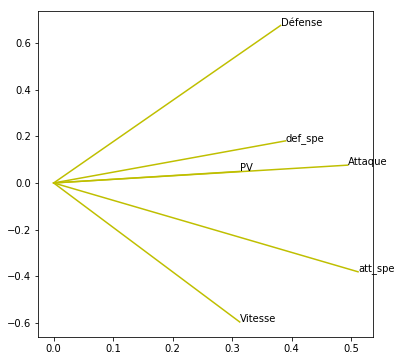

In [104]:
fig = plt.figure(figsize=(6,6))

for i, (x,y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color="y")
    plt.text(x, y, df4.columns[i])
    

### 10. Crée un dataframe ayant comme noms de colonnes columnsNames et comme valeurs les valeurs de la question 9. Fait un headmap de ce dataframe avec la méthode adéquate de Seaborn. Interprète les résultats.

In [113]:
dataframe = pd.DataFrame(pcs, columns= df4.columns)
dataframe.head()

,PV,Attaque,Défense,att_spe,def_spe,Vitesse
0,0.312895,0.494564,0.381544,0.511775,0.390062,0.312834
1,0.049624,0.076524,0.676233,-0.381388,0.180789,-0.596866
2,-0.064545,-0.720447,0.028917,0.403298,0.536315,-0.160225
3,0.801875,0.008525,-0.362444,0.120213,-0.097065,-0.449093
4,0.414971,-0.218938,-0.014940,-0.622959,0.374796,0.501090


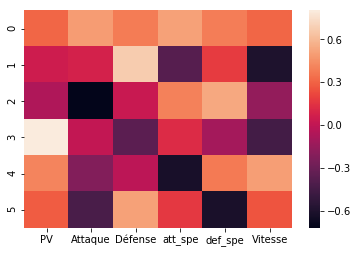

In [115]:
sns.heatmap(dataframe)